In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, accuracy_score



In [2]:
df = pd.read_csv("loan_approval_dataset.csv")
df


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved


In [3]:
df.columns = df.columns.str.strip()
print(df["loan_status"].unique()[:10])
print(df["loan_status"].value_counts(dropna=False))

[' Approved' ' Rejected']
loan_status
Approved    2656
Rejected    1613
Name: count, dtype: int64


In [4]:
df["loan_status"] = df["loan_status"].str.strip()
df["loan_status"] = df["loan_status"].map({"Approved": 1, "Rejected": 0})
print(df["loan_status"].unique())
print(df["loan_status"].value_counts())


[1 0]
loan_status
1    2656
0    1613
Name: count, dtype: int64


In [5]:
df = df.drop(columns=["loan_id"])


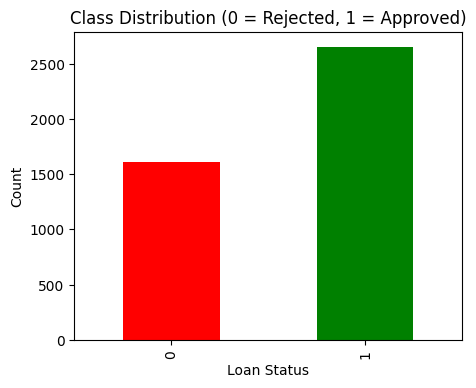

In [6]:
class_counts = df["loan_status"].value_counts().sort_index()

plt.figure(figsize=(5,4))
class_counts.plot(kind="bar", color=["red","green"])
plt.title("Class Distribution (0 = Rejected, 1 = Approved)")
plt.xlabel("Loan Status")
plt.ylabel("Count")
plt.show()

In [7]:
df.isnull().sum()

no_of_dependents            0
education                   0
self_employed               0
income_annum                0
loan_amount                 0
loan_term                   0
cibil_score                 0
residential_assets_value    0
commercial_assets_value     0
luxury_assets_value         0
bank_asset_value            0
loan_status                 0
dtype: int64

______________________________________________________________________________________________________________________
# Encoding Process
------------------------------------------------------------------------------------------------------------------------

In [8]:
#Encoding categorical columns
le = LabelEncoder()
if df["education"].dtype == "object":
    df["education"] = le.fit_transform(df["education"].str.strip())
if df["self_employed"].dtype == "object":
    df["self_employed"] = le.fit_transform(df["self_employed"].str.strip())

print(df[["education", "self_employed"]].head().to_string(index=False))

 education  self_employed
         0              0
         1              1
         0              0
         0              0
         1              1


In [9]:
#Scaling numerical features
X = df.drop(columns=["loan_status"])
y = df["loan_status"]

# Scale numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled feature shape:", X_scaled.shape)


Scaled feature shape: (4269, 11)


______________________________________________________________________________________________________________________
# Train Test Split
------------------------------------------------------------------------------------------------------------------------

In [10]:
X = df.drop(columns=["loan_status"])
y = df["loan_status"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scaling after splitting only on training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print("Train shape:", X_train_scaled.shape)
print("Test shape:", X_test_scaled.shape)


Train shape: (3415, 11)
Test shape: (854, 11)


______________________________________________________________________________________________________________________
# 1. Model Training(Logistic Regression)
------------------------------------------------------------------------------------------------------------------------

In [11]:
model1=LogisticRegression(class_weight="balanced", random_state=42, max_iter=1000)
model1.fit(X_train_scaled, y_train)
model1_pred= model1.predict(X_test_scaled)


In [12]:
print("Logistic Regression Performance:")
print(classification_report(y_test, model1_pred))



Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       323
           1       0.96      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.93      0.92      0.92       854



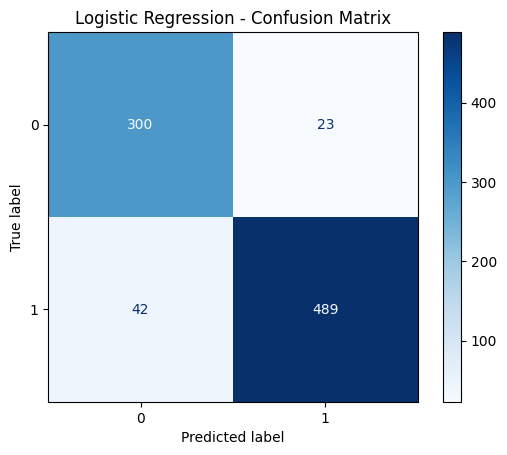

In [13]:
cm = confusion_matrix(y_test, model1_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot(cmap="Blues")
plt.title("Logistic Regression - Confusion Matrix")
plt.show()

______________________________________________________________________________________________________________________
# 2. Model Training(Decision Tree)
------------------------------------------------------------------------------------------------------------------------

In [14]:
model2 = DecisionTreeClassifier(random_state=42)
model2.fit(X_train_scaled, y_train)
model2_pred = model2.predict(X_test_scaled)


In [15]:
print("Decision Tree Performance:")
print(classification_report(y_test, model2_pred))


Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       323
           1       0.98      0.98      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



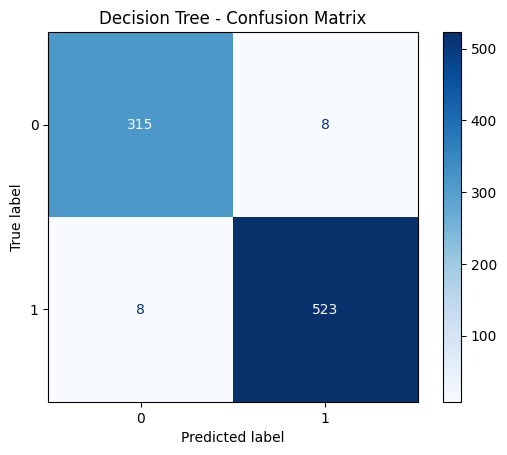

In [16]:
cm = confusion_matrix(y_test, model2_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model2.classes_)
disp.plot(cmap="Blues")
plt.title("Decision Tree - Confusion Matrix")
plt.show()

______________________________________________________________________________________________________________________
# Applying SMOTE on Training Data
------------------------------------------------------------------------------------------------------------------------

In [17]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to training set
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: loan_status
1    2125
0    1290
Name: count, dtype: int64
After SMOTE: loan_status
1    2125
0    2125
Name: count, dtype: int64


______________________________________________________________________________________________________________________
# Retraining Models on Balanced Data
------------------------------------------------------------------------------------------------------------------------

# Logistic Regression:

In [18]:
model1_smote = LogisticRegression(class_weight=None, random_state=42, max_iter=1000)
model1_smote.fit(X_train_res, y_train_res)

model1_smote_pred = model1_smote.predict(X_test_scaled)

print("Logistic Regression with SMOTE:")
print(classification_report(y_test, model1_smote_pred))


Logistic Regression with SMOTE:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90       323
           1       0.95      0.92      0.94       531

    accuracy                           0.92       854
   macro avg       0.92      0.92      0.92       854
weighted avg       0.92      0.92      0.92       854



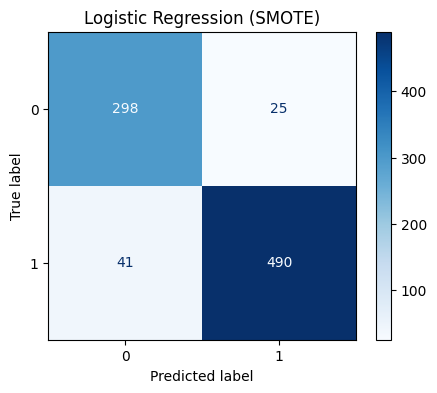

In [19]:
cm_lr = confusion_matrix(y_test, model1_smote_pred)
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=model1_smote.classes_)
fig, ax = plt.subplots(figsize=(5,4))
disp_lr.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title("Logistic Regression (SMOTE)")
plt.show()

# Decision Tree:

In [20]:
model2_smote = DecisionTreeClassifier(class_weight=None, random_state=42)
model2_smote.fit(X_train_res, y_train_res)

model2_smote_pred = model2_smote.predict(X_test_scaled)

print("Decision Tree with SMOTE:")
print(classification_report(y_test, model2_smote_pred))


Decision Tree with SMOTE:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       323
           1       0.98      0.99      0.98       531

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



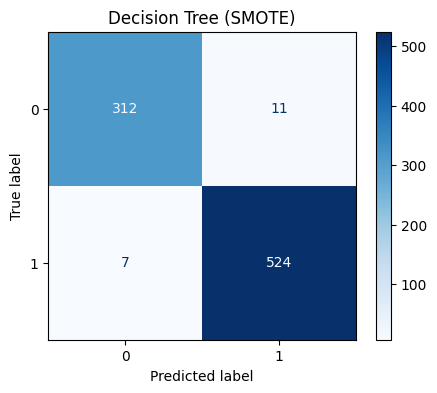

In [21]:
cm_dt = confusion_matrix(y_test, model2_smote_pred)
disp_dt = ConfusionMatrixDisplay(confusion_matrix=cm_dt, display_labels=model2_smote.classes_)
fig, ax = plt.subplots(figsize=(5,4))
disp_dt.plot(cmap="Blues", values_format="d", ax=ax, colorbar=True)
plt.title("Decision Tree (SMOTE)")
plt.show()

# Final Conclusion

In this project, I developed a machine learning pipeline to predict loan approval status. The dataset was preprocessed through handling missing values, encoding categorical features, scaling numerical features, and preparing the target labels. Both Logistic Regression and Decision Tree classifiers were tested, with additional methods (SMOTE, class weights) considered for class imbalance.

- Logistic Regression achieved 92% accuracy. While it provided a simple and interpretable baseline, it showed weaker performance in capturing rejected loan cases. Even with SMOTE, results stayed around 92%, showing limited improvement.

- Decision Tree with class_weight="balanced" achieved ~98% accuracy, showing excellent precision, recall, and F1-scores for both classes. However, results were essentially the same as the plain Decision Tree.

Decision Tree without balancing (final model) also achieved ~98% accuracy with equally strong precision, recall, and F1 across both approved and rejected classes. Since the dataset was not extremely imbalanced, the model naturally handled class distribution well without requiring SMOTE or class weights.

# Final Choice:

The Decision Tree (without class balancing or SMOTE) is the best-performing and simplest model. It delivers 98% accuracy with balanced precision, recall, and F1-scores, making it the most practical and reliable choice for loan approval prediction.

______________________________________________________________________________________________________________________
# Making Predictions
------------------------------------------------------------------------------------------------------------------------

In [22]:

new_applicant = pd.DataFrame([{
    "no_of_dependents": 2,
    "education": 1,
    "self_employed": 0,
    "income_annum": 6000000,
    "loan_amount": 20000000,
    "loan_term": 12,
    "cibil_score": 750,
    "residential_assets_value": 3000000,
    "commercial_assets_value": 5000000,
    "luxury_assets_value": 12000000,
    "bank_asset_value": 7000000
}])

new_applicant_scaled = scaler.transform(new_applicant)

prediction = model2.predict(new_applicant_scaled)

print("Prediction:", "Approved" if prediction[0] == 1 else "Rejected")


Prediction: Approved


In [23]:
new_data = pd.DataFrame({
    "no_of_dependents": [0, 3, 2],
    "education": [1, 0, 1],
    "self_employed": [0, 1, 0],
    "income_annum": [5000000, 2500000, 9000000],
    "loan_amount": [15000000, 12000000, 25000000],
    "loan_term": [10, 8, 15],
    "cibil_score": [720, 600, 780],
    "residential_assets_value": [2000000, 1000000, 7000000],
    "commercial_assets_value": [3000000, 2000000, 9000000],
    "luxury_assets_value": [10000000, 3000000, 20000000],
    "bank_asset_value": [5000000, 1500000, 10000000]
})

new_data_scaled = scaler.transform(new_data)
predictions = model2_smote.predict(new_data_scaled)
decoded_predictions = le.inverse_transform(predictions)
new_data["Prediction"] = decoded_predictions
print(new_data)


   no_of_dependents  education  self_employed  income_annum  loan_amount  \
0                 0          1              0       5000000     15000000   
1                 3          0              1       2500000     12000000   
2                 2          1              0       9000000     25000000   

   loan_term  cibil_score  residential_assets_value  commercial_assets_value  \
0         10          720                   2000000                  3000000   
1          8          600                   1000000                  2000000   
2         15          780                   7000000                  9000000   

   luxury_assets_value  bank_asset_value Prediction  
0             10000000           5000000        Yes  
1              3000000           1500000        Yes  
2             20000000          10000000        Yes  


In [24]:
import joblib

joblib.dump(model2, "model.joblib")
joblib.dump(scaler, "scaler.joblib")


['scaler.joblib']